In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_excel("/content/drive/MyDrive/Online retail data(Unsupervised learning)/online_retail_II.xlsx", sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
df.describe(include = "O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [ ]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [ ]:
df[df["Quantity"]<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [ ]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [ ]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
df["StockCode"] =df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
cleaned_df =df.copy()

In [ ]:
cleaned_df["Invoice"]= cleaned_df["Invoice"].astype("str")
mask = (
    cleaned_df["Invoice"].str.match("\\d{6}$")==True
)

cleaned_df = cleaned_df[mask]
cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")
mask = (
    (cleaned_df["StockCode"].str.match("\\d{5}$")==True)
    | (cleaned_df["StockCode"].str.match("\\d{5}[a-zA-Z]+$")==True)
    | (cleaned_df["StockCode"].str.match("^PADS$")==True)
)

cleaned_df = cleaned_df[mask]
cleaned_df


<ipython-input-44-3f718d0f4abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
cleaned_df.dropna(subset= ["Customer ID"], inplace = True)

<ipython-input-45-44e01f9d92d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset= ["Customer ID"], inplace = True)


In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [ ]:
len(cleaned_df[cleaned_df["Price"]== 0])

28

In [ ]:
cleaned_df =cleaned_df[cleaned_df["Price"]>0]

In [ ]:
len(cleaned_df)/len(df)

0.7732429238325965

## Dropped about 23% of the data after cleaning

# Feature Engineering

In [ ]:
cleaned_df["SalesLineTotal"] = cleaned_df["Price"]* cleaned_df['Quantity']
cleaned_df.head()

<ipython-input-50-77247348e540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Price"]* cleaned_df['Quantity']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
agg_df= cleaned_df.groupby(by= "Customer ID", as_index= False) \
    .agg(
        MonetoryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        Recency=("InvoiceDate", "max")
        )

agg_df.head()

,Customer ID,MonetoryValue,Frequency,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [ ]:
max_invoice_date = agg_df["Recency"].max()

agg_df["Recency"] = (max_invoice_date - agg_df["Recency"]).dt.days
agg_df.head()

,Customer ID,MonetoryValue,Frequency,Recency
0,12346.0,169.36,2,164
1,12347.0,1323.32,2,2
2,12348.0,221.16,1,73
3,12349.0,2221.14,2,42
4,12351.0,300.93,1,10


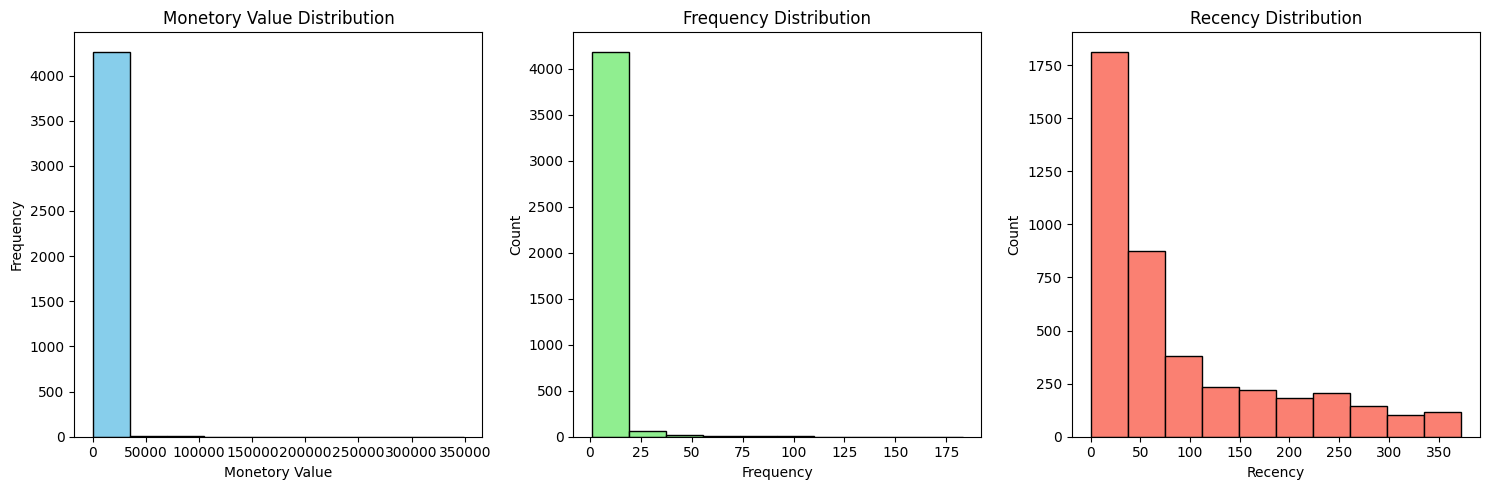

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(agg_df['MonetoryValue'], bins = 10, color ='skyblue', edgecolor='black')
plt.title('Monetory Value Distribution')
plt.xlabel('Monetory Value')
plt.ylabel('Frequency')


plt.subplot(1,3,2)
plt.hist(agg_df['Frequency'], bins = 10, color ='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(agg_df['Recency'], bins = 10, color ='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

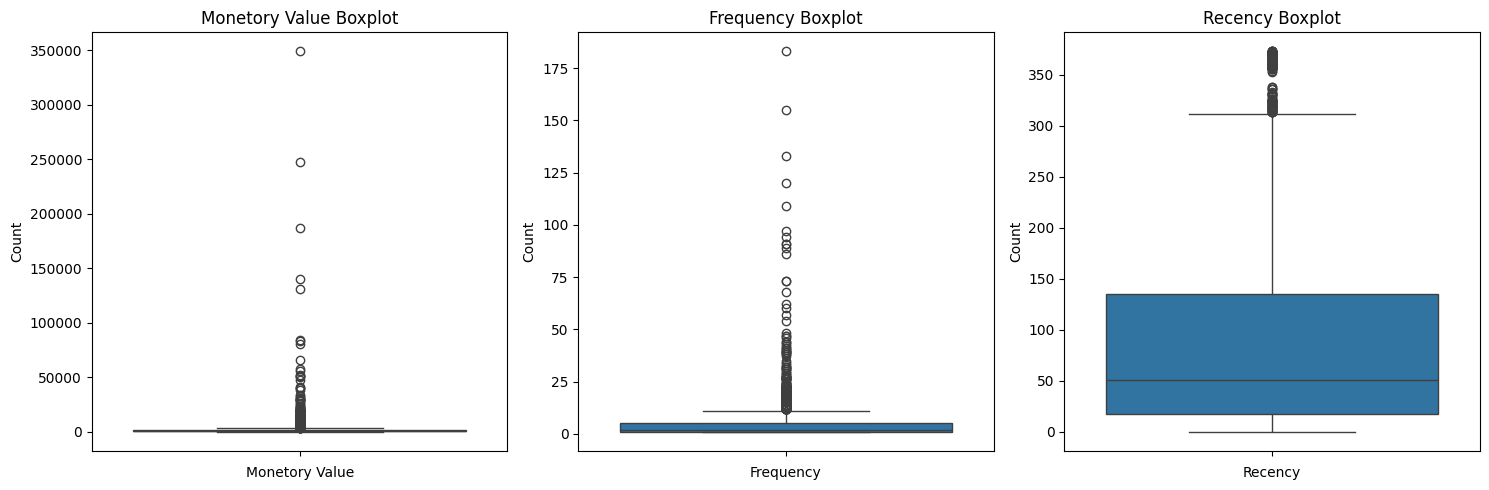

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(data = agg_df['MonetoryValue'])
plt.title('Monetory Value Boxplot')
plt.xlabel('Monetory Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(data = agg_df['Frequency'])
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(data = agg_df['Recency'])
plt.title('Recency Boxplot')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



## Managing outliers

In [ ]:
m_q1 = agg_df["MonetoryValue"].quantile(0.25)
m_q3 = agg_df["MonetoryValue"].quantile(0.75)
m_iqr = m_q3 - m_q1

monetory_outlier_df = agg_df[(agg_df["MonetoryValue"] < m_q1 - 1.5*m_iqr) | (agg_df["MonetoryValue"] > m_q3 + 1.5*m_iqr)].copy()

monetory_outlier_df.describe()

,Customer ID,MonetoryValue,Frequency,Recency
count,423.000000,423.000000,423.000000,423.000000
mean,15103.040189,12188.101740,17.167849,30.035461
std,1728.661406,25830.851045,19.729755,51.541004
min,12357.000000,3802.040000,1.000000,0.000000
25%,13622.000000,4605.940000,8.000000,3.000000
50%,14961.000000,6191.320000,12.000000,13.000000
75%,16692.000000,10273.235000,18.000000,31.000000
max,18260.000000,349164.350000,183.000000,364.000000


In [ ]:
f_q1 = agg_df["Frequency"].quantile(0.25)
f_q3 = agg_df["Frequency"].quantile(0.75)
f_iqr = f_q3 - f_q1

frequency_outlier_df = agg_df[(agg_df["Frequency"] < f_q1 - 1.5*f_iqr) | (agg_df["Frequency"] > f_q3 + 1.5*f_iqr)].copy()

frequency_outlier_df.describe()

,Customer ID,MonetoryValue,Frequency,Recency
count,279.000000,279.000000,279.000000,279.000000
mean,15352.655914,14409.714932,23.810036,16.089606
std,1748.429987,31381.736785,21.932937,26.589117
min,12437.000000,1094.390000,12.000000,0.000000
25%,13800.000000,4331.560500,13.000000,2.000000
50%,15465.000000,6615.770000,17.000000,7.000000
75%,16828.500000,11692.405000,23.000000,19.000000
max,18260.000000,349164.350000,183.000000,211.000000


In [ ]:
non_outliers= agg_df[(~agg_df.index.isin(monetory_outlier_df.index)) & (~agg_df.index.isin(frequency_outlier_df.index))].copy()
non_outliers.describe()

,Customer ID,MonetoryValue,Frequency,Recency
count,3809.000000,3809.000000,3809.000000,3809.000000
mean,15376.482804,885.502197,2.863481,97.082174
std,1693.199806,817.672283,2.243748,98.111495
min,12346.000000,1.550000,1.000000,0.000000
25%,13912.000000,279.910000,1.000000,22.000000
50%,15389.000000,588.050000,2.000000,58.000000
75%,16854.000000,1269.050000,4.000000,154.000000
max,18287.000000,3788.210000,11.000000,373.000000


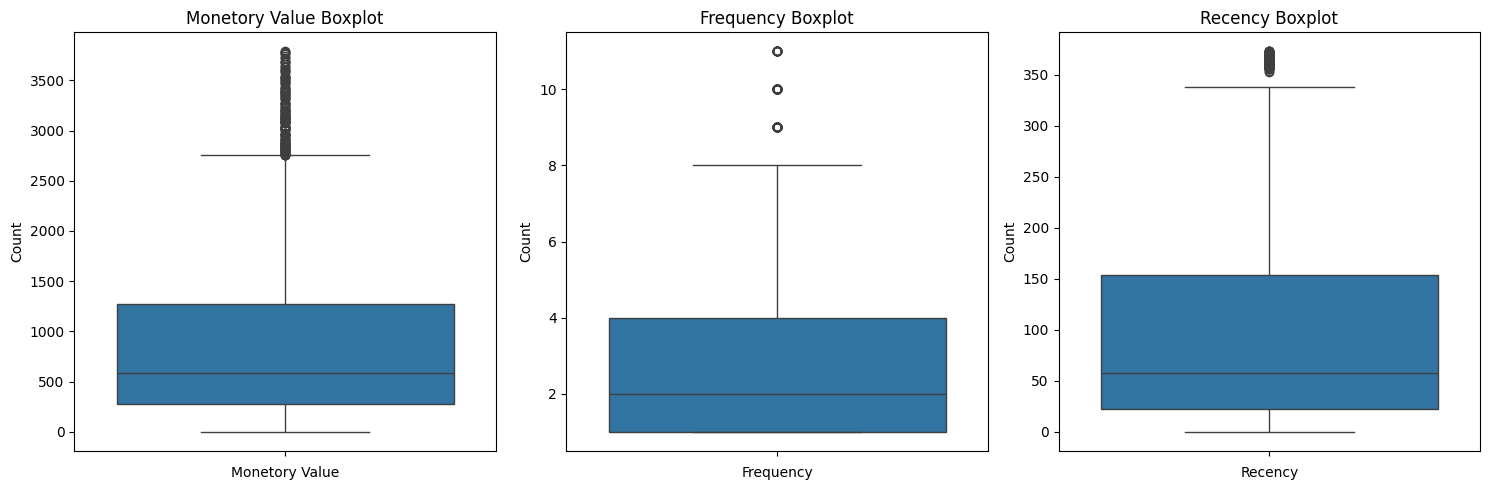

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data = non_outliers['MonetoryValue'])
plt.title('Monetory Value Boxplot')
plt.xlabel('Monetory Value')
plt.ylabel('Count')



plt.subplot(1,3,2)
sns.boxplot(data = non_outliers['Frequency'])
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.boxplot(data = non_outliers['Recency'])
plt.title('Recency Boxplot')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


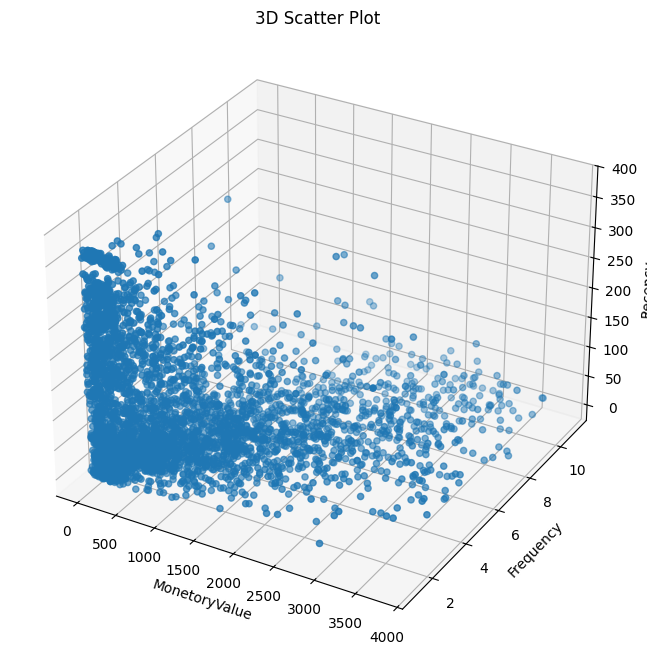

In [ ]:
fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(projection ="3d")

scatter = ax.scatter(non_outliers["MonetoryValue"], non_outliers["Frequency"], non_outliers['Recency'])

ax.set_xlabel("MonetoryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot")


plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers[["MonetoryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [ ]:
scaled_df = pd.DataFrame(scaled_data,index= non_outliers.index, columns = ["MonetoryValue", "Frequency", "Recency"])
scaled_df.head()

,MonetoryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


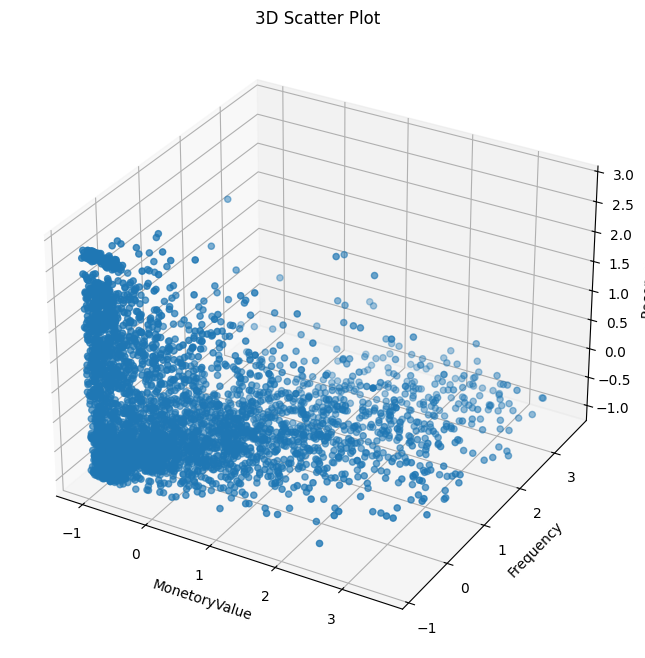

In [ ]:
fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(projection ="3d")

scatter = ax.scatter(scaled_df["MonetoryValue"], scaled_df["Frequency"], scaled_df['Recency'])

ax.set_xlabel("MonetoryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot")


plt.show()

# KMeans Clustering

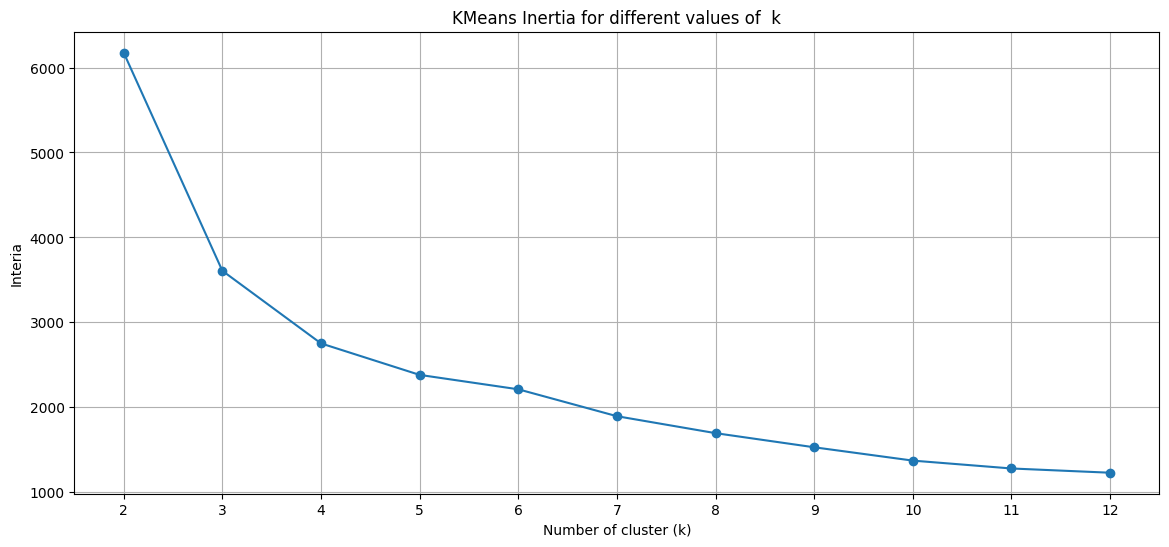

In [ ]:
from sklearn.cluster import KMeans

k_max =12

interia =[]
k_values =range(2, k_max +1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    kmeans.fit_predict(scaled_df)
    interia.append(kmeans.inertia_)

plt.figure(figsize= (14,6))

plt.plot(k_values, interia, marker ="o")
plt.xlabel("Number of cluster (k)")
plt.ylabel("Interia")
plt.title("KMeans Inertia for different values of  k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

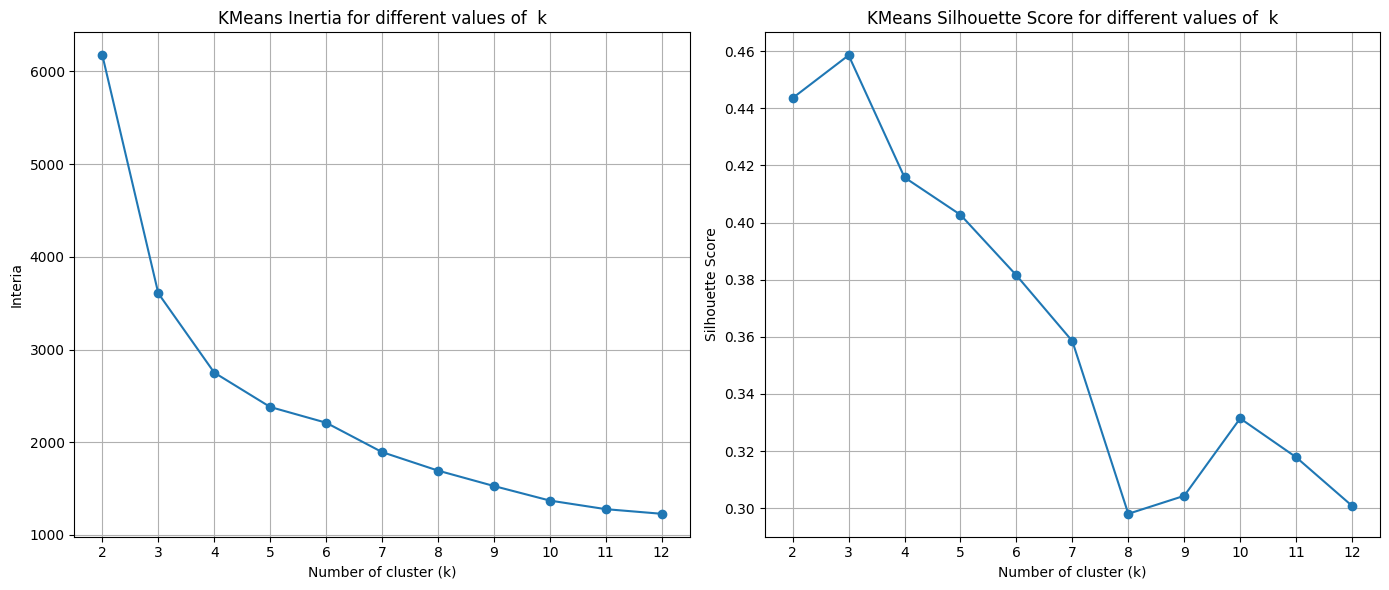

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_max =12

silhoutte_scores =[]
interia =[]
k_values =range(2, k_max +1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

    cluster_labels = kmeans.fit_predict(scaled_df)
    sil_score= silhouette_score(scaled_df, cluster_labels)
    silhoutte_scores.append(sil_score)
    interia.append(kmeans.inertia_)

plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
plt.plot(k_values, interia, marker ="o")
plt.xlabel("Number of cluster (k)")
plt.ylabel("Interia")
plt.title("KMeans Inertia for different values of  k")
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values, silhoutte_scores, marker ="o")
plt.xlabel("Number of cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("KMeans Silhouette Score for different values of  k")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()







plt.show()

In [ ]:
kmeans = KMeans(n_clusters =4, random_state = 42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
non_outliers["Cluster_labels"] = cluster_labels
non_outliers.head()

,Customer ID,MonetoryValue,Frequency,Recency,Cluster_labels
0,12346.0,169.36,2,164,1
1,12347.0,1323.32,2,2,0
2,12348.0,221.16,1,73,2
3,12349.0,2221.14,2,42,0
4,12351.0,300.93,1,10,2


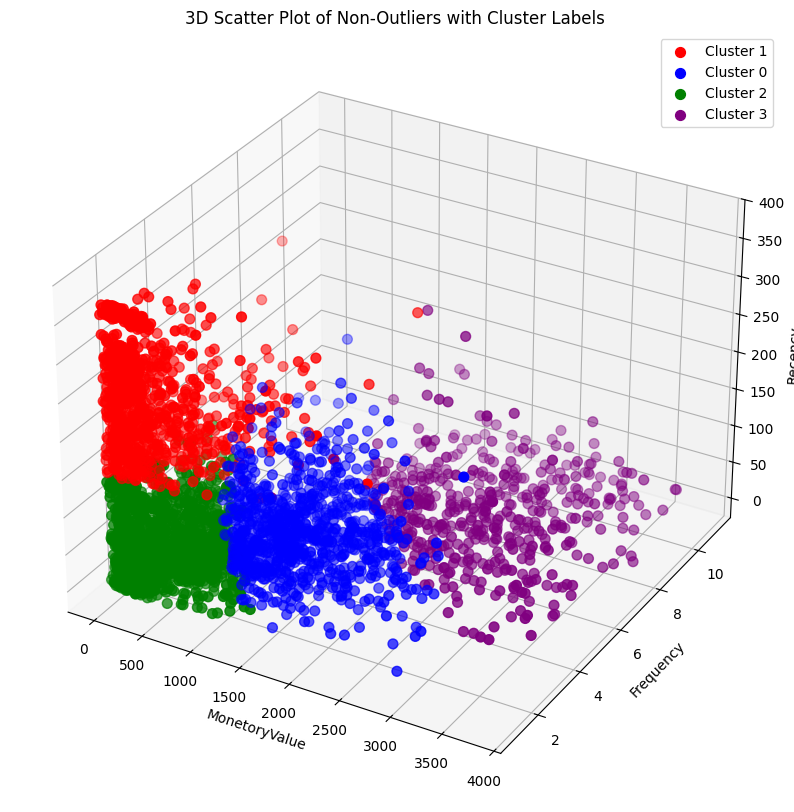

In [ ]:
# Scatter plot

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Manually define colors for each cluster (make sure you have enough colors for all unique labels)
manual_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

unique_labels = non_outliers['Cluster_labels'].unique()

# Plot each cluster separately with manual colors
for i, label in enumerate(unique_labels):
    cluster_data = non_outliers[non_outliers['Cluster_labels'] == label]
    ax.scatter(
        cluster_data["MonetoryValue"],
        cluster_data["Frequency"],
        cluster_data['Recency'],
        color=manual_colors[i % len(manual_colors)], # Use modulo to cycle through colors if there are more clusters than colors
        label=f'Cluster {label}',
        s=50 # Marker size
    )

ax.set_xlabel("MonetoryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Non-Outliers with Cluster Labels")
ax.legend() # Add a legend to show which color corresponds to which cluster

plt.show()

<ipython-input-98-72132fb7f7dd>:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(x= non_outliers['Cluster_labels'], y= non_outliers['MonetoryValue'],palette=manual_colors, hue = non_outliers['Cluster_labels'])
<ipython-input-98-72132fb7f7dd>:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(x= non_outliers['Cluster_labels'], y= non_outliers['Frequency'],palette=manual_colors, hue = non_outliers['Cluster_labels'])
<ipython-input-98-72132fb7f7dd>:18: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(x= non_outliers['Cluster_labels'], y= non_outliers['Recency'],palette=manual_colors, hue = non_outliers['Cluster_labels'])


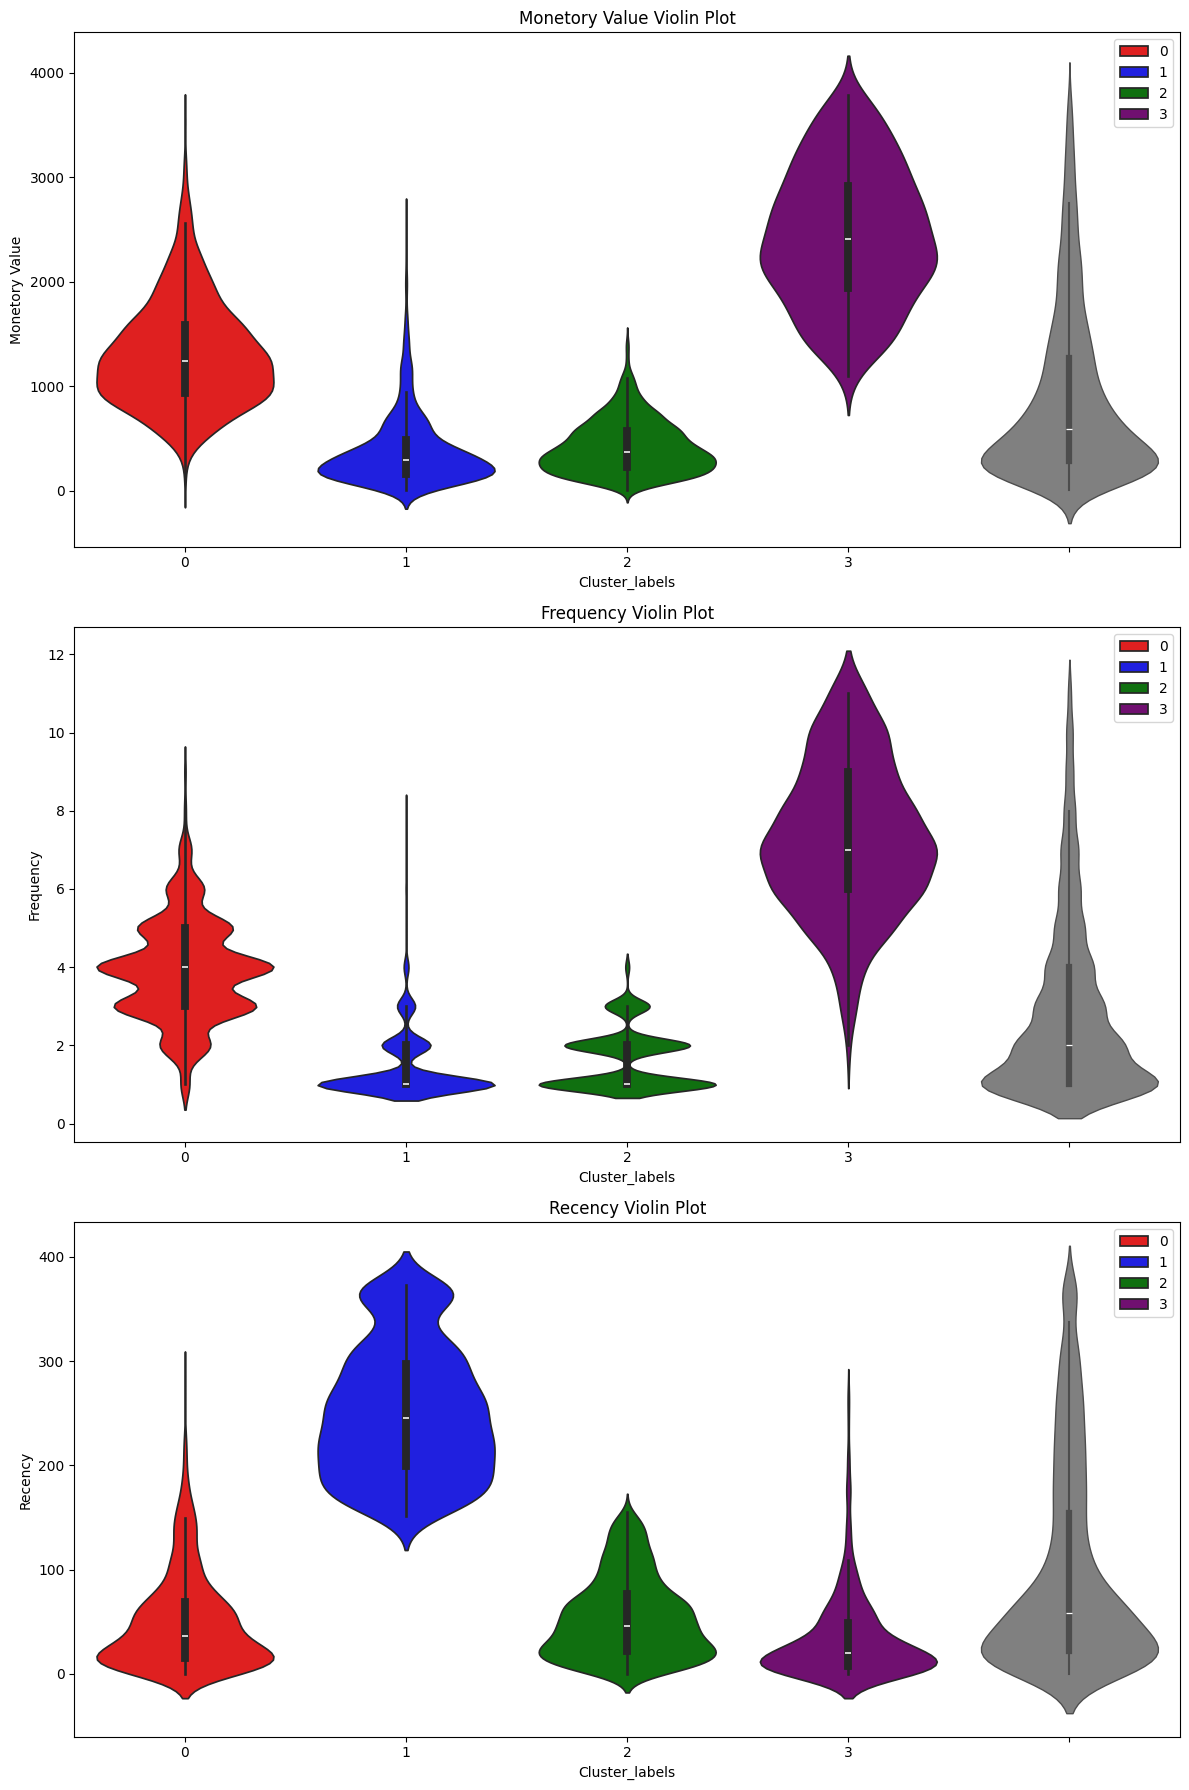

In [ ]:
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot(x= non_outliers['Cluster_labels'], y= non_outliers['MonetoryValue'],palette=manual_colors, hue = non_outliers['Cluster_labels'])
sns.violinplot(y= non_outliers['MonetoryValue'], color ="gray", linewidth=1.0)
plt.title('Monetory Value Violin Plot')
plt.xlabel('Cluster_labels')
plt.ylabel('Monetory Value')

plt.subplot(3,1,2)
sns.violinplot(x= non_outliers['Cluster_labels'], y= non_outliers['Frequency'],palette=manual_colors, hue = non_outliers['Cluster_labels'])
sns.violinplot(y= non_outliers['Frequency'], color ="gray", linewidth=1.0)
plt.title('Frequency Violin Plot')
plt.xlabel('Cluster_labels')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x= non_outliers['Cluster_labels'], y= non_outliers['Recency'],palette=manual_colors, hue = non_outliers['Cluster_labels'])
sns.violinplot(y= non_outliers['Recency'], color ="gray", linewidth=1.0)
plt.title('Recency Violin Plot')
plt.xlabel('Cluster_labels')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## 🎯 Customer Segmentation Analysis (Violin Plot-Based)

Based on the violin plots for **Monetary Value**, **Frequency**, and **Recency**, the customer clusters can be interpreted as follows:

---

### 🟥 Cluster 0 (Red)
- **Monetary:** Medium to high
- **Frequency:** Moderate
- **Recency:** Low (recent activity)

**📌 Interpretation:**  
Active customers with moderate value and consistent engagement.

**✅ Action:**  
Focus on retention and increase CLV through upselling and personalized offers.

---

### 🟦 Cluster 1 (Blue)
- **Monetary:** Low
- **Frequency:** Low
- **Recency:** High (long time since last activity)

**📌 Interpretation:**  
Lost or highly inactive customers with low historical value.

**✅ Action:**  
Consider reactivation campaigns with discounts or let them churn if reactivation cost is too high.

---

### 🟩 Cluster 2 (Green)
- **Monetary:** Low to medium
- **Frequency:** Low
- **Recency:** Medium

**📌 Interpretation:**  
Occasional or infrequent customers with potential for growth.

**✅ Action:**  
Target with loyalty programs or informational content to improve frequency and spend.

---

### 🟪 Cluster 3 (Purple)
- **Monetary:** Very high
- **Frequency:** High
- **Recency:** Very low (very recent purchases)

**📌 Interpretation:**  
Top-tier customers — frequent, recent, and high spenders.

**✅ Action:**  
Prioritize for retention using VIP rewards, early access, and premium support.

---

### ⚫ Cluster 4 (Grey)
- **Monetary:** Mixed, mostly low
- **Frequency:** Mixed, mostly low
- **Recency:** Mixed, mostly low recency

**📌 Interpretation:**  
Noisy or diverse group — potentially new or irregular customers.

**✅ Action:**  
If new: run welcome/onboarding campaigns.  
If inconsistent: perform behavioral segmentation for targeted nurturing.

---
